In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, accuracy_score,mean_squared_error,mean_absolute_error

In [18]:
from datetime import datetime

In [74]:
import plotly.express as px

In [168]:
import mlxtend

In [169]:
from mlxtend.evaluate import bias_variance_decomp

In [2]:
%matplotlib inline

In [106]:
df = pd.read_csv('Walmart.csv')

In [107]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [109]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [110]:
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [111]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Convert degrees Fahrenheit (°F) to degrees Celsius (°C)


In [112]:
df['temperature'] = df.Temperature.apply(lambda x: (x - 32)/1.8)

In [113]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,temperature
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5.727778
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,3.616667
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,4.405556
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,8.127778
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,8.055556
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,18.266667
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,18.272222
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,12.483333
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,13.594444


### Converting days and months from numerics to categories

In [114]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\lipov\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\lipov\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\lipov\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\lipov\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\lipov\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '16-04-2010' in DD/MM/YYYY format. Pro

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   temperature   6435 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 452.6 KB


In [116]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [117]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,temperature,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5.727778,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3.616667,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4.405556,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8.127778,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,8.055556,2010,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,18.266667,2012,9,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,18.272222,2012,5,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12.483333,2012,12,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,13.594444,2012,10,19


Text(31.115963541666673, 0.5, 'Price')

<Figure size 1008x720 with 0 Axes>

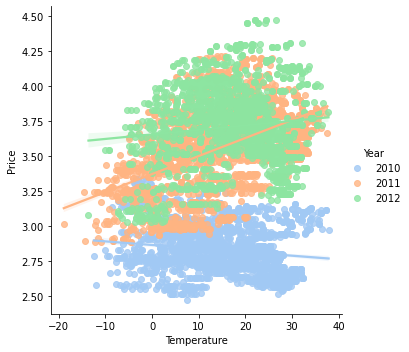

In [118]:
plt.figure(figsize=(14,10))
sns.lmplot(x='temperature', y='Fuel_Price', data=df, hue='Year', palette=sns.color_palette('pastel'))

plt.xlabel('Temperature')
plt.ylabel('Price')

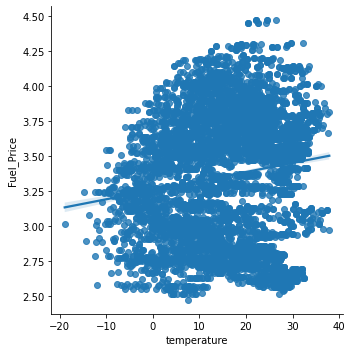

In [119]:
sns.lmplot(x='temperature', y='Fuel_Price', data=df)

<Figure size 1008x720 with 0 Axes>

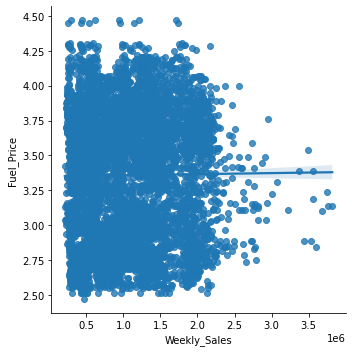

In [120]:
plt.figure(figsize=(14,10))
sns.lmplot(x='Weekly_Sales', y='Fuel_Price', data=df)

<Figure size 1008x720 with 0 Axes>

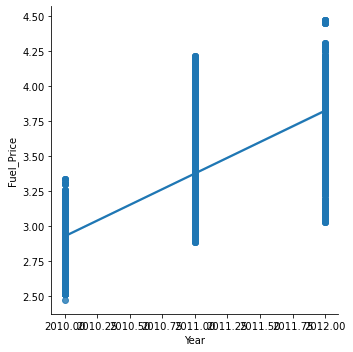

In [121]:
plt.figure(figsize=(14,10))
sns.lmplot(x='Year', y='Fuel_Price', data=df)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Count'>

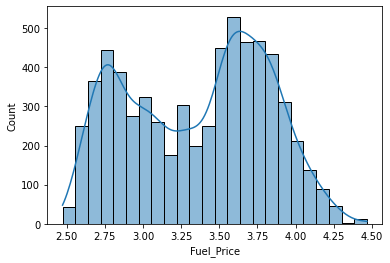

In [122]:
sns.histplot(data=df, x = 'Fuel_Price', kde=True)

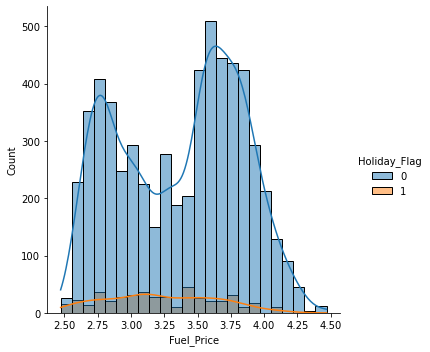

In [123]:
sns.displot(x='Fuel_Price', data=df, hue='Holiday_Flag', kde = True)

In [153]:
df['Price_Fuel'] = np.log(df.Fuel_Price)

In [154]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,temperature,Year,Month,Day,Price_Fuel
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5.727778,2010,5,2,0.944684
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3.616667,2010,12,2,0.935309
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4.405556,2010,2,19,0.921875
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8.127778,2010,2,26,0.940398
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,8.055556,2010,5,3,0.965081


<AxesSubplot:xlabel='Fuel_Price', ylabel='Count'>

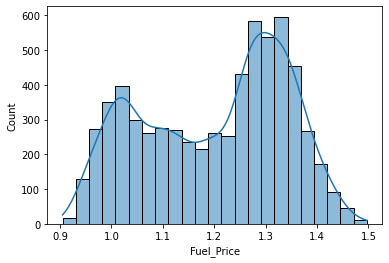

In [124]:
sns.histplot(data=df, x = np.log(df.Fuel_Price), kde=True)

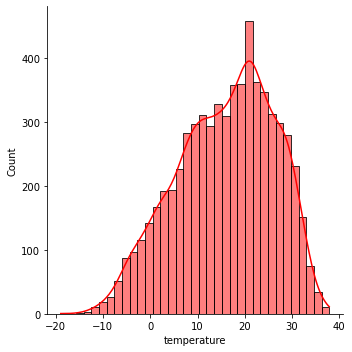

In [125]:
sns.displot(df['temperature'],kde=True,color = 'r')

In [126]:
fig = px.histogram(df, x='temperature', y ='Weekly_Sales', color='Holiday_Flag')
fig.show()

<AxesSubplot:xlabel='Unemployment', ylabel='Fuel_Price'>

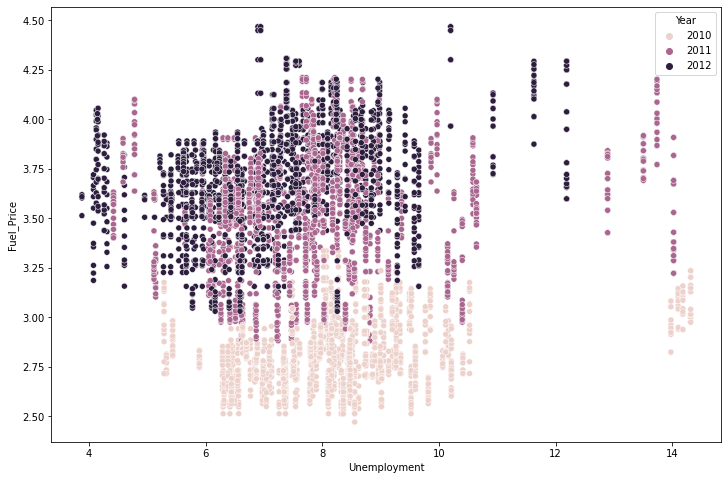

In [127]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x = 'Unemployment', y='Fuel_Price', hue = 'Year')

In [128]:
set(df.Year)

{2010, 2011, 2012}

In [129]:
df3 = df.groupby(by='Year')['Weekly_Sales'].mean()


<AxesSubplot:xlabel='Year', ylabel='count'>

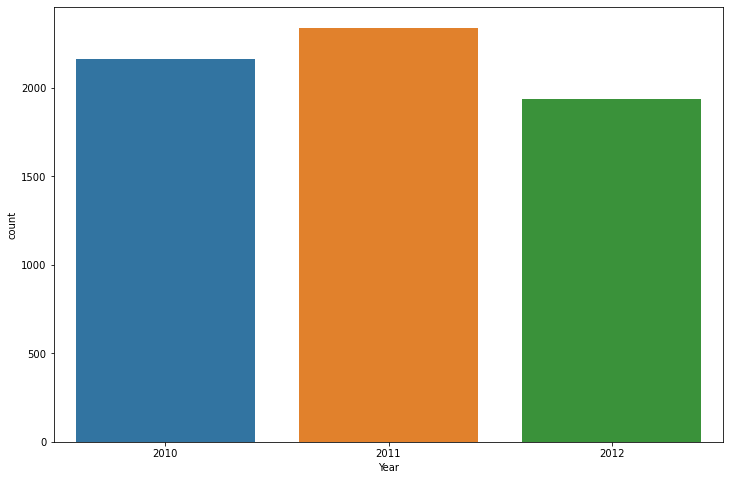

In [130]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Year')

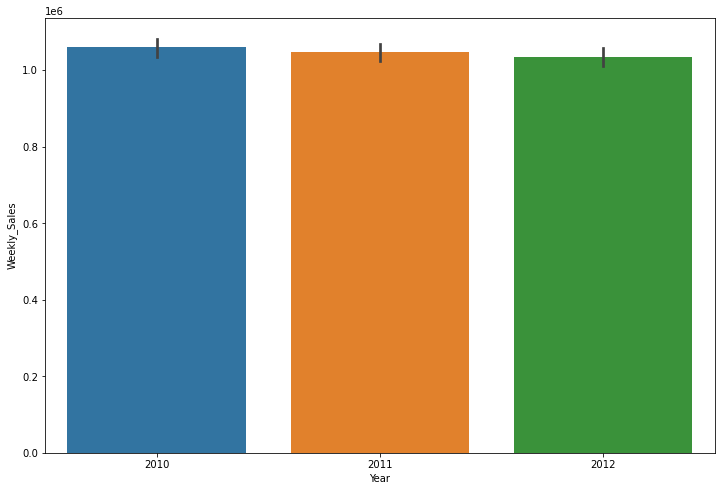

In [277]:
plt.figure(figsize=(12,8))
fig = sns.barplot(x='Year', y='Weekly_Sales', data=df)

In [132]:
df4 = df.groupby(by='Year')['Fuel_Price'].mean()
df4

Year
2010    2.823767
2011    3.561915
2012    3.709776
Name: Fuel_Price, dtype: float64

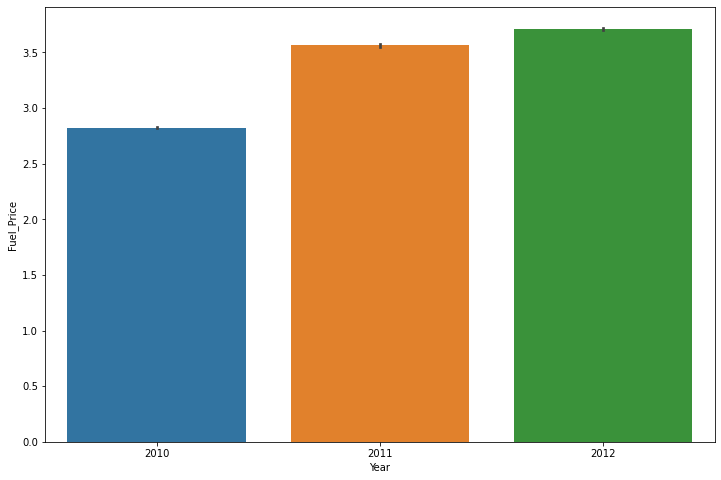

In [279]:
plt.figure(figsize=(12,8))
fig = sns.barplot(x='Year', y='Fuel_Price', data=df)

<AxesSubplot:xlabel='Year'>

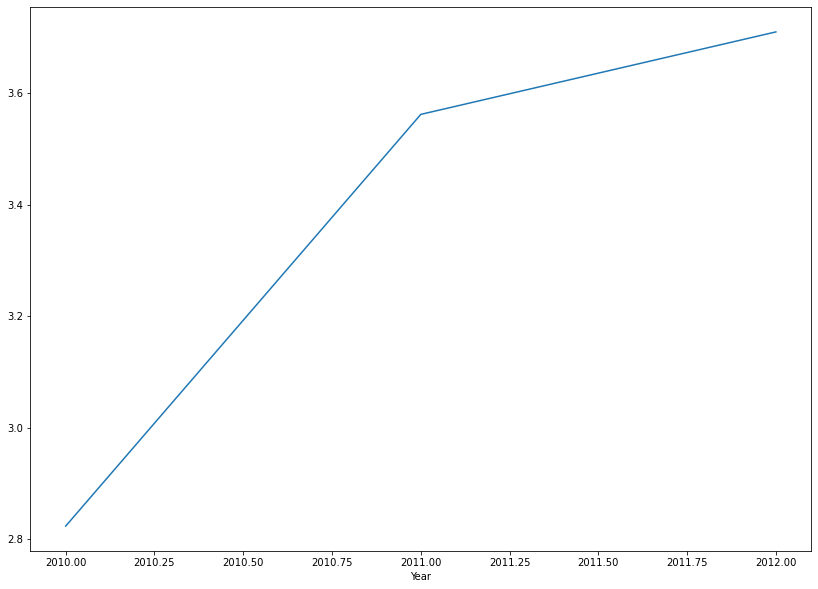

In [134]:
plt.figure(figsize=(14,10))
df4.plot.line()

In [135]:
df5 = df.groupby(by='Store')['Weekly_Sales'].mean()
df5

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Weekly Sales')

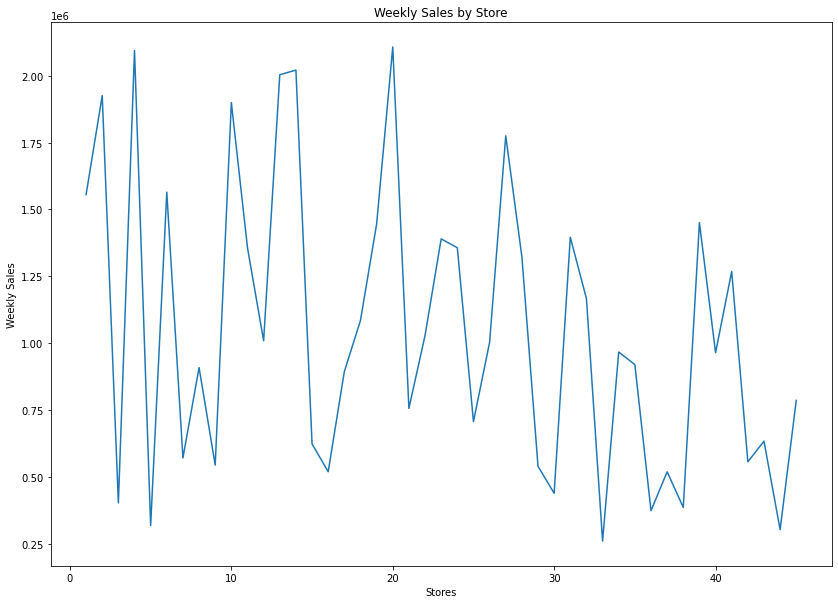

In [268]:
plt.figure(figsize=(14,10))
sns.lineplot(data=df5, x = df5.index, y = df5.values )
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')

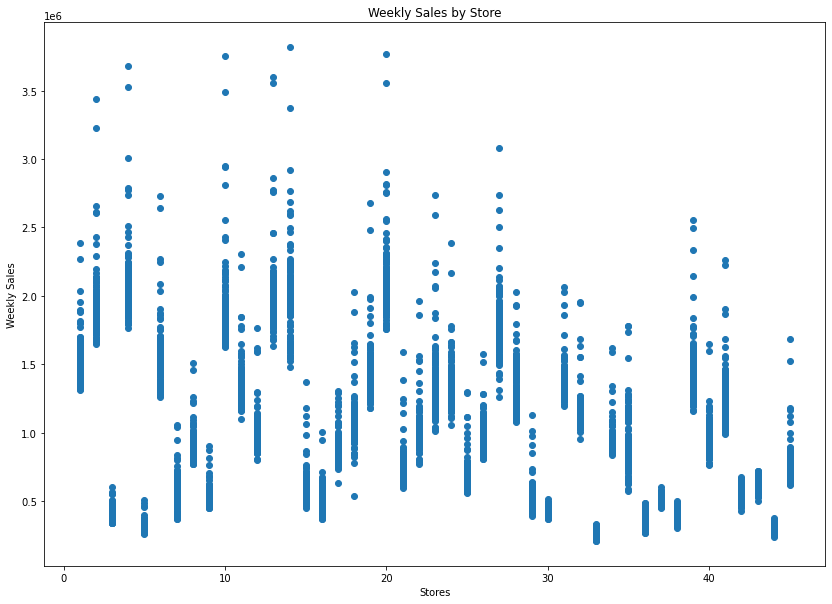

In [269]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(14,10))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

<AxesSubplot:xlabel='Month'>

<Figure size 1008x720 with 0 Axes>

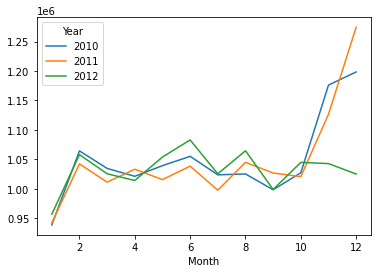

In [273]:
plt.figure(figsize=(14,10))
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

<AxesSubplot:xlabel='Month'>

<Figure size 1008x720 with 0 Axes>

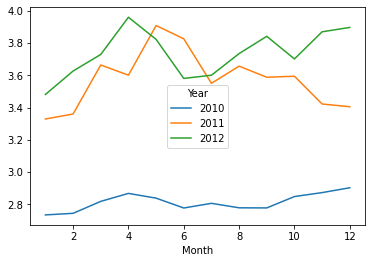

In [280]:
plt.figure(figsize=(14,10))
monthly_sales = pd.pivot_table(df, values = "Fuel_Price", columns = "Year", index = "Month")
monthly_sales.plot()

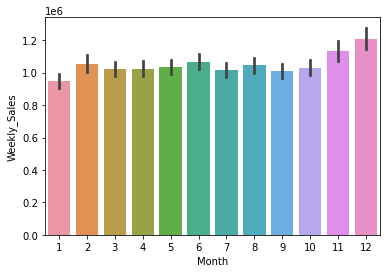

In [274]:
fig = sns.barplot(x='Month', y='Weekly_Sales', data=df)

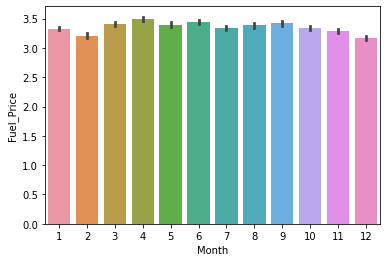

In [275]:
fig = sns.barplot(x='Month', y='Fuel_Price', data=df)

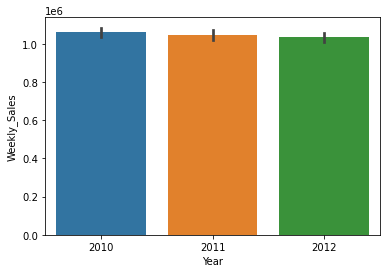

In [276]:
fig = sns.barplot(x='Year', y='Weekly_Sales', data=df)

In [156]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,temperature,Year,Month,Day,Price_Fuel
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5.727778,2010,5,2,0.944684
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3.616667,2010,12,2,0.935309
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4.405556,2010,2,19,0.921875
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8.127778,2010,2,26,0.940398
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,8.055556,2010,5,3,0.965081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,18.266667,2012,9,28,1.385544
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,18.272222,2012,5,10,1.382537
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12.483333,2012,12,10,1.386294
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,13.594444,2012,10,19,1.378514


<AxesSubplot:>

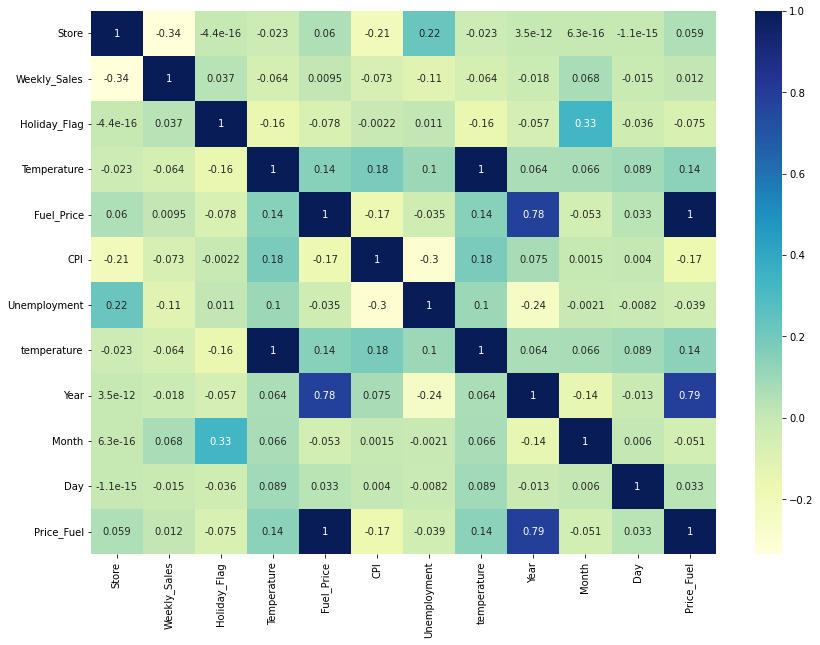

In [282]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap ="YlGnBu")

### Regresja liniowa

In [158]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'temperature', 'Year', 'Month',
       'Day', 'Price_Fuel'],
      dtype='object')

In [159]:
X1 = df[['Store', 'Weekly_Sales', 'Holiday_Flag', 'CPI', 'Unemployment', 'temperature', 'Year']]

In [160]:
y1 = df['Fuel_Price']

In [161]:
X2 = df[['Store', 'Holiday_Flag', 'temperature', 'Year']]

In [162]:
y2 = df['Price_Fuel']

In [192]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.2, random_state=123)

In [217]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y1, test_size=0.2, random_state=123)

In [240]:
X_train3, X_test3, y_train3, y_test3 = train_test_split( X1, y2, test_size=0.2, random_state=123)

### Model 1.1

In [147]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

In [148]:
predict1 = model1.predict(X_test1)

In [149]:
r2_score(y_test1, predict1)

0.7050274569020991

In [150]:
model1.coef_

array([ 1.72804718e-08, -3.13935283e-02, -2.55452431e-03,  1.99467407e-02,
        5.74629688e-03,  4.63455743e-01])

In [151]:
cdf1 = pd.DataFrame(model1.coef_, X1.columns, columns=['Coeffecient'])
cdf1

,Coeffecient
Weekly_Sales,1.728047e-08
Holiday_Flag,-3.139353e-02
CPI,-2.554524e-03
Unemployment,1.994674e-02
temperature,5.746297e-03
Year,4.634557e-01


In [152]:
model1.intercept_

-928.4634615367963

In [166]:
price_model1 = df['Fuel_Price']
predict_price_model1 = pd.Series(predict1)
error_model1 = price_model1 - predict_price_model1
data_pedict_model1 = pd.DataFrame({'price':price_model1,
                                  'Predict_price' : predict_price_model1,
                                  'Error' : error_model1})
data_pedict_model1.head()

,price,Predict_price,Error
0,2.572,3.915483,-1.343483
1,2.548,3.059790,-0.511790
2,2.514,3.396674,-0.882674
3,2.561,3.535525,-0.974525
4,2.625,3.035070,-0.410070


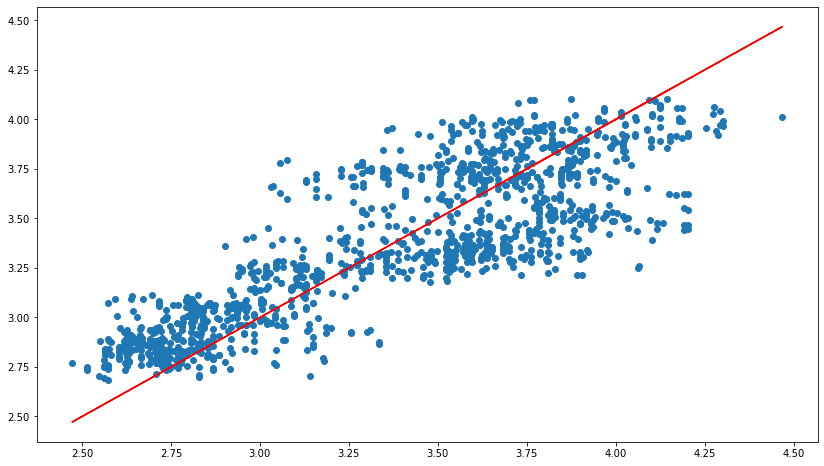

In [167]:
plt.figure(figsize=(14,8))
plt.scatter(y_test1, predict1)
plt.plot(y_test1, y_test1, color = 'red')

### Bias, wariancja

In [170]:
mse1, bias1, variance1= bias_variance_decomp(model1, X_train1.values, y_train1.values, X_test1.values, y_test1.values, loss='mse', random_seed=123, num_rounds=200)

In [174]:
bias_model1 = pd.DataFrame({'Mse1': [mse1],
                                  'Bias1' : [bias1],
                                  'Variance1' : [variance1]})

In [175]:
bias_model1

,Mse1,Bias1,Variance1
0,0.06381,0.063714,0.000096


### MAE, MSE, RMSE

In [176]:
M_Error_model1 = pd.DataFrame({'MAE': [mean_absolute_error(y_test1, predict1)],
                                  'MSE' : [mean_squared_error(y_test1, predict1)],
                                  'RMSE' : [mean_squared_error(y_test1, predict1, squared=False)]})

In [177]:
M_Error_model1

,MAE,MSE,RMSE
0,0.204118,0.063756,0.2525


## Model 1.2

In [220]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [221]:
predict2 = model2.predict(X_test2)

In [222]:
r2_score(y_test2, predict2)

0.6263566816676485

In [223]:
model2.coef_

array([ 0.00215941, -0.04321215,  0.00451433,  0.44330002])

In [225]:
cdf2 = pd.DataFrame(model2.coef_, X2.columns, columns=['Coeffecient'])
cdf2

,Coeffecient
Store,0.002159
Holiday_Flag,-0.043212
temperature,0.004514
Year,0.443300


In [226]:
model2.intercept_

-888.221021471357

In [227]:
price_model2 = df['Fuel_Price']
predict_price_model2 = pd.Series(predict2)
error_model2 = price_model2 - predict_price_model2
data_pedict_model2 = pd.DataFrame({'price':price_model2,
                                  'Predict_price' : predict_price_model2,
                                  'Error' : error_model2})
data_pedict_model2.head()

,price,Predict_price,Error
0,2.572,3.797831,-1.225831
1,2.548,2.955146,-0.407146
2,2.514,3.373606,-0.859606
3,2.561,3.456188,-0.895188
4,2.625,2.958741,-0.333741


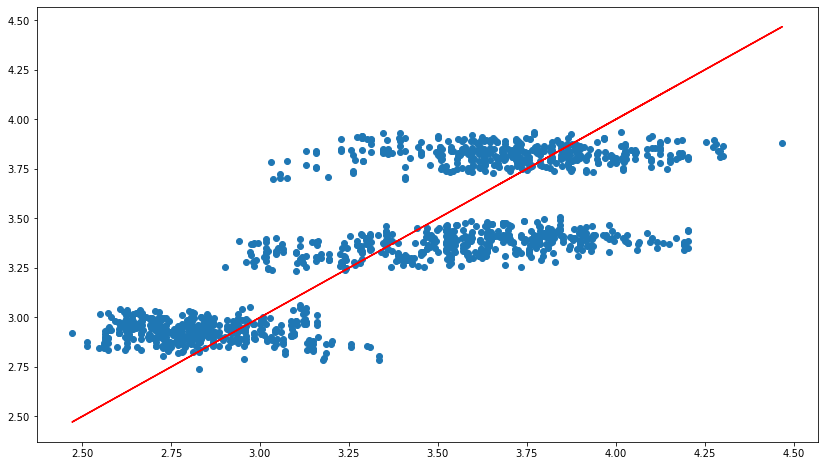

In [250]:
plt.figure(figsize=(14,8))
plt.scatter(y_test2, predict2)
plt.plot(y_test2, y_test2, color = 'red')

### Bias, wariancja

In [229]:
mse2, bias2, variance2= bias_variance_decomp(model2, X_train2.values, y_train2.values, X_test2.values, y_test2.values, loss='mse', random_seed=123, num_rounds=200)

In [230]:
bias_model2 = pd.DataFrame({'Mse2': [mse2],
                                  'Bias2' : [bias2],
                                  'Variance2' : [variance2]})

In [231]:
bias_model2

,Mse2,Bias2,Variance2
0,0.080805,0.08074,0.000065


### MAE, MSE, RMSE

In [232]:
M_Error_model2 = pd.DataFrame({'MAE': [mean_absolute_error(y_test2, predict2)],
                                  'MSE' : [mean_squared_error(y_test2, predict2)],
                                  'RMSE' : [mean_squared_error(y_test2, predict2, squared=False)]})

In [233]:
M_Error_model2

,MAE,MSE,RMSE
0,0.229941,0.080761,0.284184


## Model 1.3

In [241]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)

LinearRegression()

In [242]:
predict3 = model3.predict(X_test3)

In [243]:
r2_score(y_test3, predict3)

0.7130516294209894

In [245]:
model3.coef_

array([ 5.66665886e-05,  6.26907353e-09, -8.69278714e-03, -7.49638526e-04,
        6.06263234e-03,  1.59757205e-03,  1.42284223e-01])

In [246]:
cdf3 = pd.DataFrame(model3.coef_, X1.columns, columns=['Coeffecient'])
cdf3

,Coeffecient
Store,5.666659e-05
Weekly_Sales,6.269074e-09
Holiday_Flag,-8.692787e-03
CPI,-7.496385e-04
Unemployment,6.062632e-03
temperature,1.597572e-03
Year,1.422842e-01


In [247]:
model3.intercept_

-284.87921577044443

In [248]:
price_model3 = df['Price_Fuel']
predict_price_model3 = pd.Series(predict3)
error_model3 = price_model3 - predict_price_model3
data_pedict_model3 = pd.DataFrame({'price':price_model3,
                                  'Predict_price' : predict_price_model3,
                                  'Error' : error_model3})
data_pedict_model3.head()

,price,Predict_price,Error
0,0.944684,1.372195,-0.427511
1,0.935309,1.107847,-0.172538
2,0.921875,1.214413,-0.292538
3,0.940398,1.253904,-0.313506
4,0.965081,1.102102,-0.137021


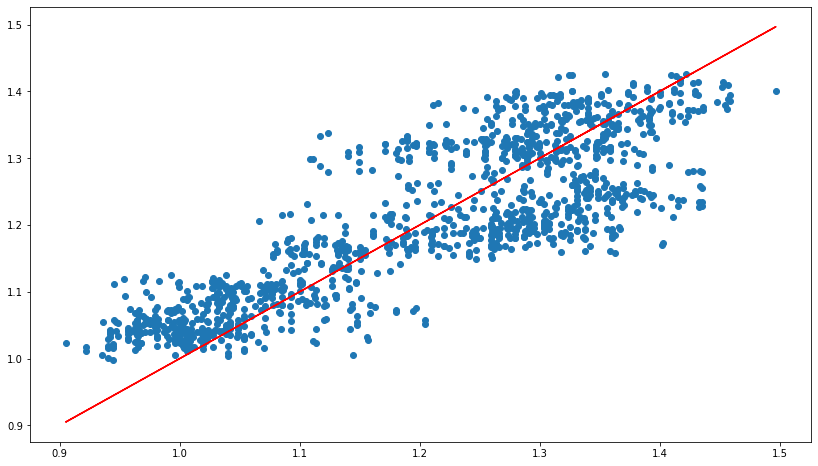

In [251]:
plt.figure(figsize=(14,8))
plt.scatter(y_test3, predict3)
plt.plot(y_test3, y_test3, color = 'red')

### Bias, wariancja

In [252]:
mse3, bias3, variance3= bias_variance_decomp(model3, X_train3.values, y_train3.values, X_test3.values, y_test3.values, loss='mse', random_seed=123, num_rounds=200)

In [253]:
bias_model3 = pd.DataFrame({'Mse3': [mse3],
                                  'Bias3' : [bias3],
                                  'Variance3' : [variance3]})

In [254]:
bias_model3

,Mse3,Bias3,Variance3
0,0.005734,0.005725,0.000009


### MAE, MSE, RMSE

In [255]:
M_Error_model3 = pd.DataFrame({'MAE': [mean_absolute_error(y_test3, predict3)],
                                  'MSE' : [mean_squared_error(y_test3, predict3)],
                                  'RMSE' : [mean_squared_error(y_test3, predict3, squared=False)]})

In [256]:
M_Error_model3

,MAE,MSE,RMSE
0,0.061579,0.005728,0.075682


## TreeDecisions

### Model 2.1

In [288]:
model21=DecisionTreeRegressor()
model21.fit(X_train1,y_train1)

DecisionTreeRegressor()

In [289]:
predict_data21=model21.predict(X_test1)

In [291]:
r2_score(y_test1, predict_data21)

0.9577564944355113

In [300]:
model21.get_depth()

28

In [301]:
model21.get_n_leaves()

3986

### Model 2.2

In [294]:
model22=DecisionTreeRegressor()
model22.fit(X_train2,y_train2)

DecisionTreeRegressor()

In [295]:
predict_data22=model22.predict(X_test2)

In [296]:
r2_score(y_test2, predict_data22)

0.8656134039538259

In [298]:
model22.get_depth()

28

In [299]:
model22.get_n_leaves()

4975

### Model 2.3

In [302]:
model23=DecisionTreeRegressor()
model23.fit(X_train3,y_train3)

DecisionTreeRegressor()

In [303]:
predict_data23=model23.predict(X_test3)

In [304]:
r2_score(y_test3, predict_data23)

0.957168556993639

In [306]:
model23.get_depth()

26

In [307]:
model23.get_n_leaves()

3862